In [2]:
import cv2
import imageio
import matplotlib.pyplot as plt

/var/folders/qr/06840hdx0_n24x3_vtrp47rm0000gn/T/ipykernel_9026/3437011277.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('/Users/rishitkapoor/Documents/Python_ML/CoputerVision/COVID-19_Radiography_Dataset/Normal/images/Normal-1838.png')


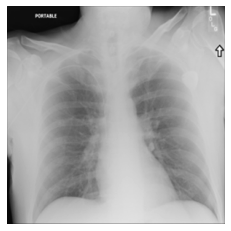

In [2]:
im = imageio.imread('/Users/rishitkapoor/Documents/Python_ML/CoputerVision/COVID-19_Radiography_Dataset/Normal/images/Normal-1838.png')
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

In [5]:
import pandas as pd
import numpy as np
import os

In [4]:
df = pd.read_excel('/Users/rishitkapoor/Documents/Python_ML/CoputerVision/COVID-19_Radiography_Dataset/COVID.metadata.xlsx')
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [8]:
urls = os.listdir('/Users/rishitkapoor/Documents/Python_ML/CoputerVision/COVID-19_Radiography_Dataset/COVID/images')
path = '/Users/rishitkapoor/Documents/Python_ML/CoputerVision/COVID-19_Radiography_Dataset/COVID/images/' + urls[0]
path

'/Users/rishitkapoor/Documents/Python_ML/CoputerVision/COVID-19_Radiography_Dataset/COVID/images/COVID-1.png'

In [10]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [11]:
covid_path = '/Users/rishitkapoor/Documents/Python_ML/CoputerVision/COVID-19_Radiography_Dataset/COVID/images'
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [12]:
normal_path = "/Users/rishitkapoor/Documents/Python_ML/CoputerVision/COVID-19_Radiography_Dataset/Normal/images"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [13]:
print(covidImages.shape)

print(normalImages.shape)

(3616, 100, 100, 3)
(10192, 100, 100, 3)


In [14]:
data = np.r_[covidImages, normalImages]
data.shape

(13808, 100, 100, 3)

In [15]:
targets = np.r_[covidTargets, normalTargets]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [18]:
data.shape[1:4]

(100, 100, 3)

In [23]:
model = Sequential([
    Conv2D(32,3,input_shape=(data.shape[1:4]),activation = 'relu'),
    MaxPooling2D(),
    Conv2D(16,3,activation='relu'),
    MaxPooling2D(),
    Conv2D(16,3,activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 16)       0

In [25]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5


2023-04-04 18:35:24.235513: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


324/324 [==============================] - 19s 57ms/step - loss: 0.3774 - accuracy: 0.8238 - val_loss: 0.3452 - val_accuracy: 0.8352
Epoch 2/5
324/324 [==============================] - 18s 56ms/step - loss: 0.2666 - accuracy: 0.8843 - val_loss: 0.2197 - val_accuracy: 0.9061
Epoch 3/5
324/324 [==============================] - 18s 55ms/step - loss: 0.2189 - accuracy: 0.9083 - val_loss: 0.1862 - val_accuracy: 0.9209
Epoch 4/5
324/324 [==============================] - 18s 57ms/step - loss: 0.1649 - accuracy: 0.9341 - val_loss: 0.1741 - val_accuracy: 0.9316
Epoch 5/5
324/324 [==============================] - 18s 56ms/step - loss: 0.1359 - accuracy: 0.9477 - val_loss: 0.1562 - val_accuracy: 0.9380


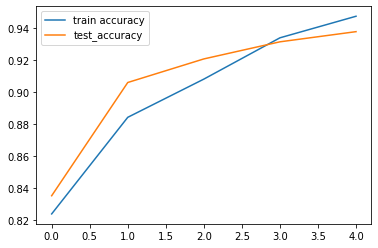

In [27]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

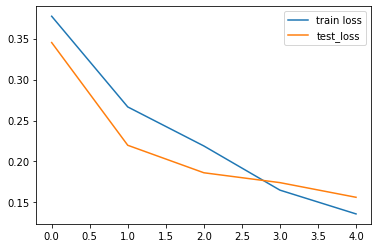

In [28]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()

In [3]:
imag = cv2.imread('/Users/rishitkapoor/Documents/Python_ML/CoputerVision/COVID-19_Radiography_Dataset/COVID/images/COVID-2465.png')

In [12]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
sam = sam_model_registry["vit_h"](checkpoint="/Users/rishitkapoor/Documents/Python_ML/CoputerVision/sam_vit_h_4b8939.pth")
#mask_generator = SamAutomaticMaskGenerator(sam)
mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.86,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
)
masks = mask_generator.generate(imag)

In [13]:
import numpy as np

In [14]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

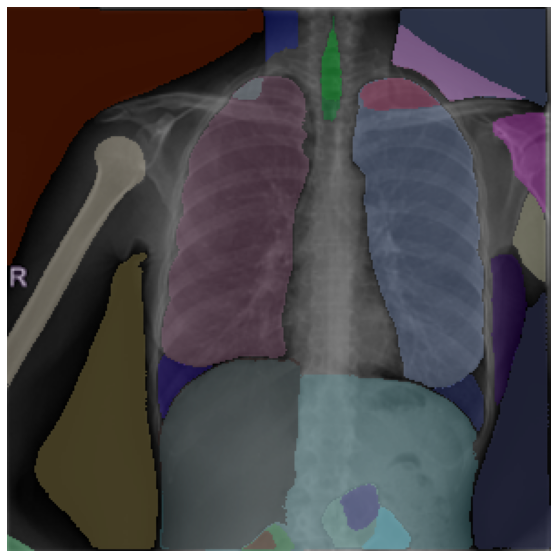

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(imag)
show_anns(masks)
plt.axis('off')
plt.show() 